In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def sim_1(v,a):
  t = np.linspace(0, (2*v/a)+5,100)
  x_m = v*t
  x_p = 1/2*a*t**2
  plt.plot(t, x_m)
  plt.plot(t,x_p)

In [ ]:

def sim_2(a):
  r = np.linspace(0.1,0.2,100)
  Vr = 4*((r**-12)+(r**-6))
  l_vr2 = [a/5, a/2, a]
  for x in l_vr2:
    Vr2 = 4*(((r**-12)*x)+((r**-6)*x))
    plt.plot(r, Vr2)


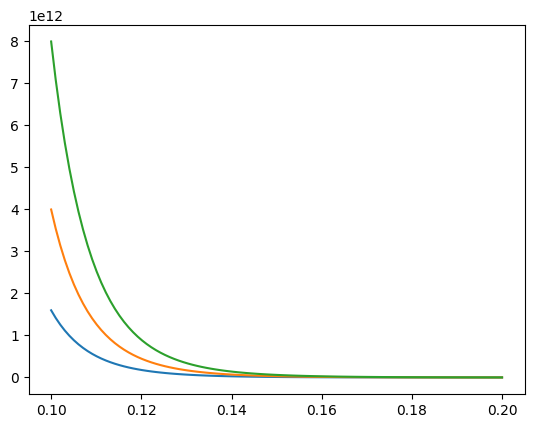

In [ ]:
sim_2(2)


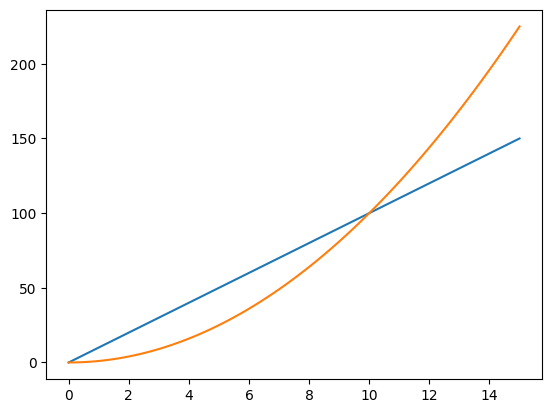

In [ ]:
sim_1(10,2)

<ipython-input-47-3b09ff09c45e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_merged_niño['GDP per Adult (USD)'] = dt_merged_niño['GDP per Adult (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
<ipython-input-47-3b09ff09c45e>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_merged_niña['GDP per Adult (USD)'] = dt_merged_niña['GDP per Adult (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)


<Axes: xlabel='GDP per Adult (USD)', ylabel='Niñas 19 (cm)'>

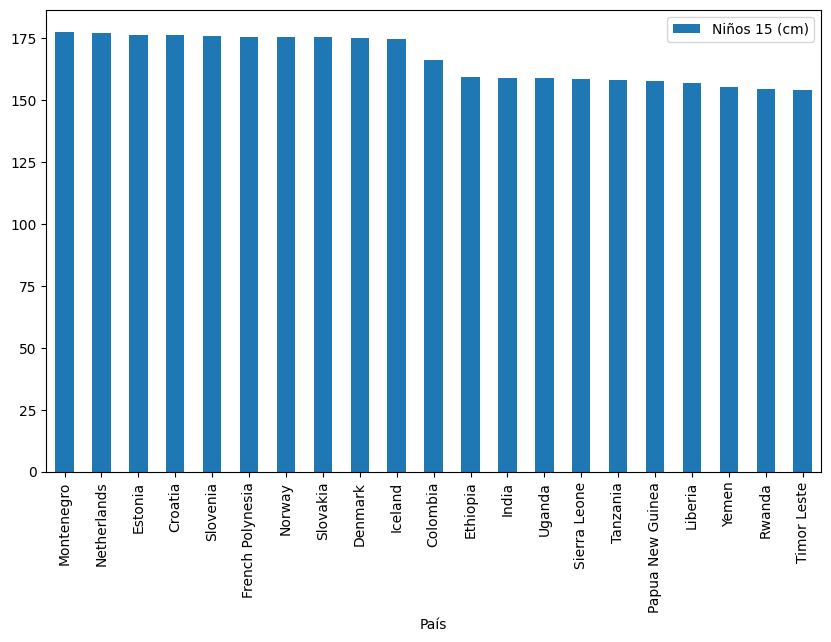

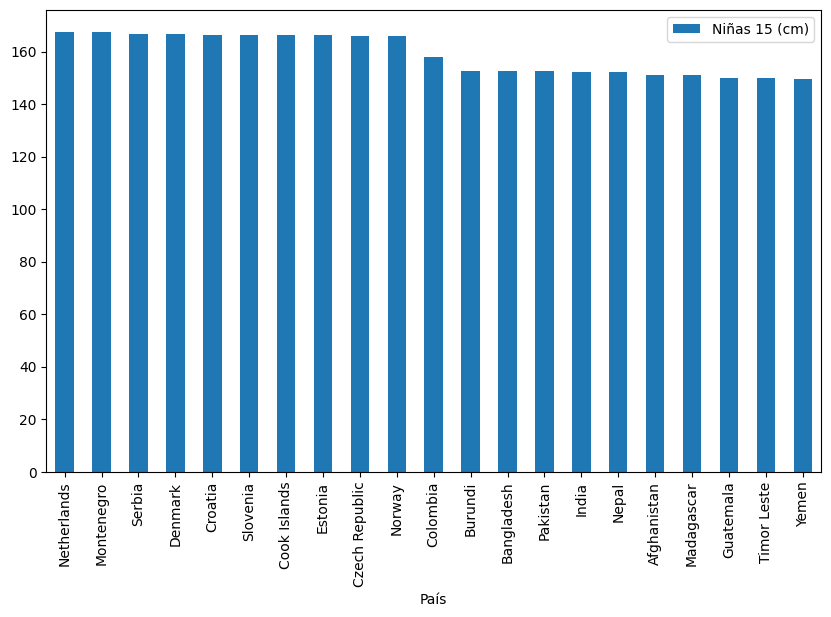

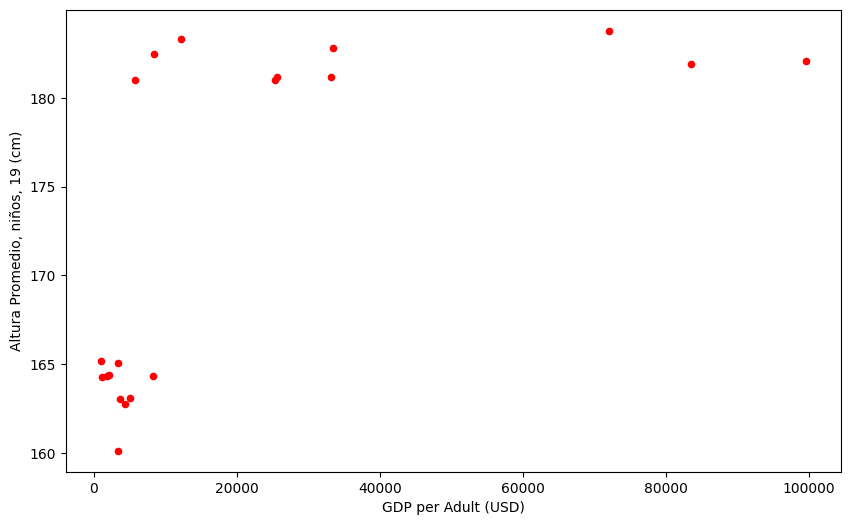

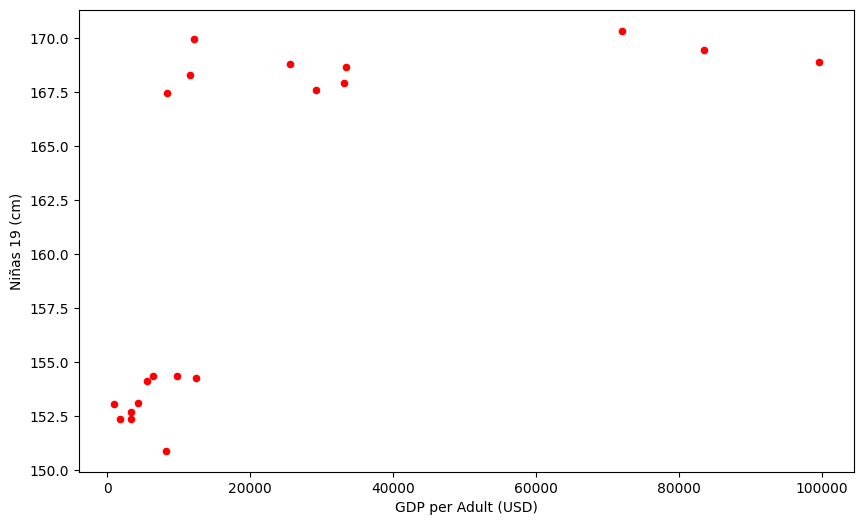

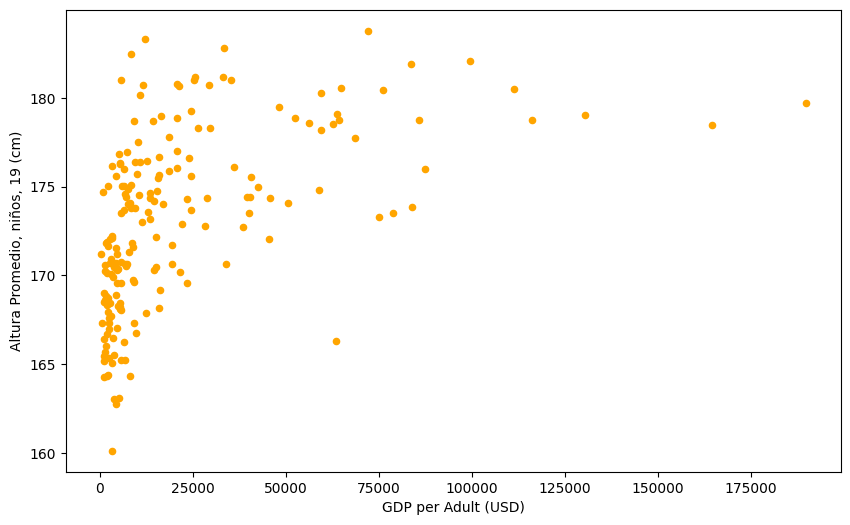

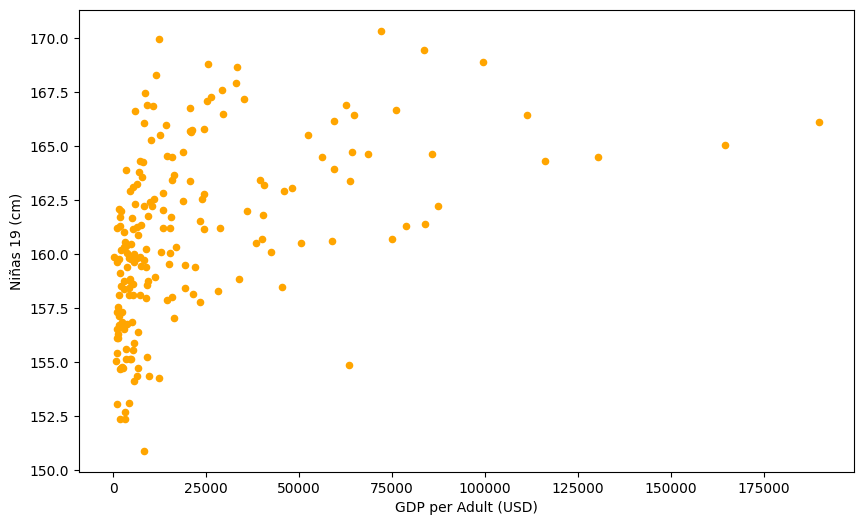

In [ ]:
import pandas as pd
import matplotlib as plst


# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)
alturas = html_content[2]
alturas.drop(columns=['Girls 19 (in)', 'Boys 19 (in)'], inplace=True)
df_alt = pd.DataFrame(alturas)
df_altR = df_alt.rename(columns ={'Country':'País', 'Average Height, Boys, 19 yo (cm)':'Altura Promedio, niños, 19 (cm)', 'Girls 19 (cm)': 'Niñas 19 (cm)', 'Boys 15 (cm)':'Niños 15 (cm)', 'Girls 15 (cm)': 'Niñas 15 (cm)','Boys 10 (cm)':'Niños 10(cm)','Girls 10 (cm)':'Niñas 10 (cm)', 'Boys 5 (cm)':'Niños 5 (cm)','Girls 5 (cm)':'Niñas 5 (cm)'})
dataset_niño = df_altR[['País', 'Niños 15 (cm)']]
dataset_niña = df_altR[['País', 'Niñas 15 (cm)']]
dataset_ordenado_niño = dataset_niño.sort_values(by='Niños 15 (cm)', ascending=False)
dataset_ordenado_niña = dataset_niña.sort_values(by='Niñas 15 (cm)', ascending=False)
diez_mas_altos_niño = dataset_ordenado_niño.head(10)
diez_mas_altos_niña = dataset_ordenado_niña.head(10)
diez_menos_altos_niño = dataset_ordenado_niño.tail(10)
diez_menos_altos_niña = dataset_ordenado_niña.tail(10)
fila_colombia_niño = dataset_ordenado_niño[dataset_ordenado_niño['País'] == 'Colombia']
fila_colombia_niña = dataset_ordenado_niña[dataset_ordenado_niña['País'] == 'Colombia']
diez_mas_altos_niño = pd.concat([diez_mas_altos_niño, fila_colombia_niño])
diez_mas_altos_niña = pd.concat([diez_mas_altos_niña, fila_colombia_niña])
barras_niño = pd.concat([diez_mas_altos_niño, diez_menos_altos_niño])
barras_niña = pd.concat([diez_mas_altos_niña, diez_menos_altos_niña])
barras_niño = barras_niño.sort_values(by='Niños 15 (cm)', ascending=False)
barras_niña = barras_niña.sort_values(by='Niñas 15 (cm)', ascending=False)
barras_niño.plot(kind='bar', x='País', y=['Niños 15 (cm)'], figsize=(10, 6))
barras_niña.plot(kind='bar', x='País', y=['Niñas 15 (cm)'], figsize=(10, 6))

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
df = pd.DataFrame(income)
dataset_merged = pd.merge(df_altR, df, left_on='País', right_on='Country')
dataset_merged.drop(columns=['Country'], inplace=True)
dt_merged_niño = dataset_merged[['País', 'Altura Promedio, niños, 19 (cm)', 'GDP per Adult (USD)']]
dt_merged_niña =  dataset_merged[['País', 'Niñas 19 (cm)', 'GDP per Adult (USD)']]
dt_merged_niño_ordenado = dt_merged_niño.sort_values(by='Altura Promedio, niños, 19 (cm)', ascending=False)
dt_merged_niña_ordenado = dt_merged_niña.sort_values(by='Niñas 19 (cm)', ascending=False)
diez_mas_altos_niño_merged = dt_merged_niño_ordenado.head(10)
diez_mas_altos_niña_merged = dt_merged_niña_ordenado.head(10)
diez_menos_altos_niño_merged = dt_merged_niño_ordenado.tail(10)
diez_menos_altos_niña_merged = dt_merged_niña_ordenado.tail(10)
barras_dt_merged_niño = pd.concat([diez_mas_altos_niño_merged, diez_menos_altos_niño_merged])
barras_dt_merged_niña = pd.concat([diez_mas_altos_niña_merged, diez_menos_altos_niña_merged])
barras_dt_merged_niño['GDP per Adult (USD)'] = barras_dt_merged_niño['GDP per Adult (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
barras_dt_merged_niña['GDP per Adult (USD)'] = barras_dt_merged_niña['GDP per Adult (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
barras_dt_merged_niño.plot(kind='scatter', x='GDP per Adult (USD)', y='Altura Promedio, niños, 19 (cm)', figsize=(10, 6), color='red')
barras_dt_merged_niña.plot(kind='scatter', x='GDP per Adult (USD)', y='Niñas 19 (cm)', figsize=(10, 6), color='red')
dt_merged_niño['GDP per Adult (USD)'] = dt_merged_niño['GDP per Adult (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
dt_merged_niña['GDP per Adult (USD)'] = dt_merged_niña['GDP per Adult (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
dt_merged_niño.plot(kind='scatter', x='GDP per Adult (USD)', y='Altura Promedio, niños, 19 (cm)', figsize=(10, 6), color='orange')
dt_merged_niña.plot(kind='scatter', x='GDP per Adult (USD)', y='Niñas 19 (cm)', figsize=(10, 6), color='orange')